# Project

## Import and basic description

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# Reading in data from csv or excel file.
df = pd.read_csv('Mumbai_property_details.csv')

print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

The dataset has 23405 rows and 18 columns


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rehannischal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Transaction Type,Property Type,Location,Year of Construction,Is Luxury,Description,Property Image
0,1BHK Multistorey Apartment for Rent in Bandra West,"70,000",750 12800,1,1,Furnished,NaN,7,NaN,South -West,Main Road,Rent,Apartment,Mumbai,2012.0,F,"1 BHK, Multistorey Apartment is available for Rent in Bandra West, Mumbai for 70,000",67249079_2_PropertyImage345-4855396928822.jpg
1,3BHK Multistorey Apartment for Rent in Lodha New Cuffe Parade at Wadala East,1.4 Lac,1980 12800,3,4,Unfurnished,4,21,NaN,East,"Garden/Park, Pool, Main Road",Rent,Apartment,Mumbai,1994.0,F,"3 BHK, Multistorey Apartment is available for Rent in Wadala East, Mumbai for 1.35 Lac(s)",66155783_5_hatsAppImage20230217at13.56.28.jpeg
2,3BHK Multistorey Apartment for Rent in Lodha Park at Bhim Nagar Worli,1.9 Lac,1592 12800,3,3,Unfurnished,1,20,NaN,North - East,Main Road,Rent,Apartment,Mumbai,NaN,F,"3 BHK, Multistorey Apartment is available for Rent in Bhim Nagar Worli, Mumbai for 1.85 Lac(s)",66686709_1_HOTO20230407165614.jpg
3,3BHK Multistorey Apartment for Rent in Rustomjee Elanza at Malad West,1.1 Lac,1305 12800,3,3,Unfurnished,3,11,Freehold,West,"Garden/Park, Main Road",Rent,Apartment,Mumbai,2010.0,F,"3 BHK, Multistorey Apartment is available for Rent in Malad West, Mumbai for 1.50 Lac(s)",67875387_1_PropertyImage559-8385323621333.jpg
4,3BHK Multistorey Apartment for Rent in DLH The Park Residences at Andheri West,1.4 Lac,1350 12800,3,3,Unfurnished,NaN,29,Freehold,East,"Pool, Garden/Park, Main Road",Rent,Apartment,Mumbai,2000.0,F,"3 BHK, Multistorey Apartment is available for Rent in Andheri West, Mumbai for 1.40 Lac(s)",66670931_3_PropertyImage314-6685675359874.jpg


In [2]:
y = "Price"
X = [x for x in df.columns if x != y]

## Data Cleaning/Wrangling

### Data Cleaning

#### Duplicates

In [3]:
df[df.duplicated()]

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Transaction Type,Property Type,Location,Year of Construction,Is Luxury,Description,Property Image
997,1BHK Multistorey Apartment for Rent in Omkar Meridia at Bandra Kurla Complex,"55,000",700 12800,1,1,Semi-Furnished,NaN,1,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in Bandra Kurla Complex, Mumbai for 55,000",Project-Photo-1-Omkar-Meridia-Mumbai-5026784_420_477.jpg
1380,1BHK Multistorey Apartment for Rent in Virar West,"8,500",675 12800,1,2,Semi-Furnished,NaN,9,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in Virar West, Mumbai for 8,500",NaN
2004,1BHK Multistorey Apartment for Rent in Hill park Tower at Jogeshwari West,"28,000",550 12800,1,1,Unfurnished,NaN,4,NaN,NaN,Garden/Park,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in Jogeshwari West, Mumbai for 28,000",NaN
2314,1BHK Residential House for Rent in Kandivali East,"7,000",200 12800,1,1,Unfurnished,NaN,1,NaN,NaN,NaN,Rent,Residential House,Mumbai,NaN,F,"1 BHK, Residential House is available for Rent in Kandivali East, Mumbai for 7,000",NaN
3188,Multistorey Apartment for Rent in,Call for Price,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"Multistorey Apartment is available for Rent in , Mumbai",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23392,1BHK Multistorey Apartment for Rent in,25 Lac,655 12800,1,1,Unfurnished,2,4,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in , Mumbai",NaN
23396,2BHK Multistorey Apartment for Rent in Nalasopara East,38 Lac,650 12800,2,1,Unfurnished,NaN,4,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"2 BHK, Multistorey Apartment is available for Rent in Nalasopara East, Mumbai",NaN
23397,1BHK Multistorey Apartment for Rent in Malad West,1 Cr,480 12800,1,1,Unfurnished,NaN,Ground,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in Malad West, Mumbai",NaN
23400,1BHK Multistorey Apartment for Rent in Goregaon East,60 Lac,500 12800,1,1,Semi-Furnished,NaN,8,NaN,NaN,NaN,Rent,Apartment,Mumbai,NaN,F,"1 BHK, Multistorey Apartment is available for Rent in Goregaon East, Mumbai",NaN


In [4]:
for i in df.columns:
  print(i)
  print(df[i].value_counts().size)
  print("\n")

Title
7035


Price
477


Area
1381


BHK
8


Bathrooms
11


Furnished
3


Balconies
11


Floor
80


Ownership
4


Facing
8


Amenities
16


Transaction Type
1


Property Type
7


Location
1


Year of Construction
54


Is Luxury
1


Description
9582


Property Image
16750




Here it is possible to see that there are 3111 rows that would be candidates to be duplicates. Nonetheless, none of the columns have unique values, so we can't be sure that they effectively are duplicates.

#### Drop columns

In the previous value_counts, it is possible to see that the following columns:

 - Transaction Type
 - Location
 - Is Luxury

 Have only 1 value. Therefore, they don't give us any information, so we can drop those columns.

In [5]:
# Drop from df
df.drop(["Transaction Type","Location","Is Luxury"], axis=1, inplace=True)

#Remove from list
X.remove("Transaction Type")
X.remove("Location")
X.remove("Is Luxury")

Since we are not going to be analysing images in this project, we can drop the image column

In [6]:
# Drop from df
df.drop("Property Image", axis=1, inplace=True)

#Remove from list
X.remove("Property Image")

#### Missing values

##### Total info

In [7]:
df.isnull().sum()

Title                       0
Price                       2
Area                        0
BHK                       411
Bathrooms                 204
Furnished                 189
Balconies               13017
Floor                    1120
Ownership               20570
Facing                   4281
Amenities                5313
Property Type               0
Year of Construction     8520
Description                 0
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

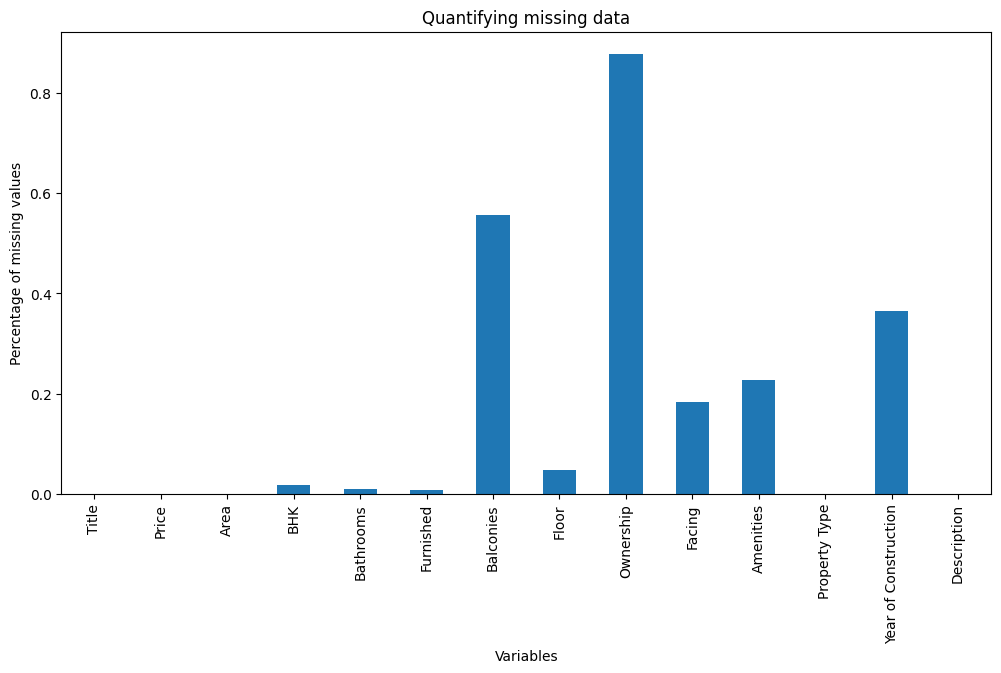

In [8]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23405 entries, 0 to 23404
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 23405 non-null  object 
 1   Price                 23403 non-null  object 
 2   Area                  23405 non-null  object 
 3   BHK                   22994 non-null  object 
 4   Bathrooms             23201 non-null  object 
 5   Furnished             23216 non-null  object 
 6   Balconies             10388 non-null  object 
 7   Floor                 22285 non-null  object 
 8   Ownership             2835 non-null   object 
 9   Facing                19124 non-null  object 
 10  Amenities             18092 non-null  object 
 11  Property Type         23405 non-null  object 
 12  Year of Construction  14885 non-null  float64
 13  Description           23405 non-null  object 
dtypes: float64(1), object(13)
memory usage: 2.5+ MB


##### Price

In [10]:
df["Price"][df["Price"].isnull()]

3155     NaN
23267    NaN
Name: Price, dtype: object

We see that there are 2 missing values on the Price column. Given that this is the response variable, those rows will not be useful in the training sample nor in the test sample so we have to eliminate those rows.

In [11]:
#Drop from df - because it is only 2 rows

##### BHK

In [12]:
df["BHK"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23405 entries, 0 to 23404
Series name: BHK
Non-Null Count  Dtype 
--------------  ----- 
22994 non-null  object
dtypes: object(1)
memory usage: 183.0+ KB


In [13]:
#See other columns information to see if we can determine number of rooms
df[df["BHK"].isnull()]

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Description
256,Studio Apartment for Rent in Poonam Nagar Jogeshwari East,"20,000",256 12800,NaN,1,Semi-Furnished,1,4,NaN,North - East,Main Road,Studio Apartment,NaN,"Studio Apartment is available for Rent in Poonam Nagar Jogeshwari East, Mumbai for 20,000"
456,Studio Apartment for Rent in Ravi Kiran at Chinchpada,"14,500",350 12800,NaN,1,Unfurnished,1,4,NaN,North,Garden/Park,Studio Apartment,NaN,"Studio Apartment is available for Rent in Chinchpada, Mumbai for 14,500"
467,Studio Apartment for Rent in Vishnu Mahal at Churchgate,"26,000",250 12800,NaN,1,Furnished,NaN,Ground,NaN,North,NaN,Studio Apartment,NaN,"Studio Apartment is available for Rent in Churchgate, Mumbai for 26,000"
556,Studio Apartment for Rent in Cumballa Hill,"65,000",500 12800,NaN,1,Furnished,NaN,8,NaN,NaN,NaN,Studio Apartment,NaN,"Studio Apartment is available for Rent in Cumballa Hill, Mumbai for 65,000"
627,Studio Apartment for Rent in Mayfair The View at Vikhroli West,"30,000",450 12800,NaN,1,Furnished,NaN,Upper Basement,NaN,East,"Pool, Main Road",Studio Apartment,2009.0,"Studio Apartment is available for Rent in Vikhroli West, Mumbai for 30,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,Multistorey Apartment for Rent in Ram Mandir at Jogeshwari East,Call for Price,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,NaN,"Multistorey Apartment is available for Rent in Jogeshwari East, Mumbai"
23373,Multistorey Apartment for Rent in Hubtown Sunstone at Kala Nagar,Call for Price,None,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,Apartment,NaN,"Multistorey Apartment is available for Rent in Kala Nagar, Mumbai"
23374,Multistorey Apartment for Rent in Dahisar West,Call for Price,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,NaN,"Multistorey Apartment is available for Rent in Dahisar West, Mumbai"
23375,Multistorey Apartment for Rent in Andheri West,Call for Price,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apartment,NaN,"Multistorey Apartment is available for Rent in Andheri West, Mumbai"


Change: from 0 to 1

In [14]:
#On the ones that are "Studio" we can set the BHK (number of bedrooms) to 1
df["BHK"][df["BHK"].isnull() & df["Title"].str.contains("Studio")] = 1

/var/folders/wr/gsfv7by93j599fxlzzp32z1w0000gn/T/ipykernel_2571/818581781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BHK"][df["BHK"].isnull() & df["Title"].str.contains("Studio")] = 1


In [15]:
# Drop the other nulls because we don't have information on how many rooms each property has and they are not many rows
df = df.dropna(subset=["BHK"])

##### Bathrooms

In [16]:
df["Bathrooms"].info()

<class 'pandas.core.series.Series'>
Int64Index: 23255 entries, 0 to 23404
Series name: Bathrooms
Non-Null Count  Dtype 
--------------  ----- 
23193 non-null  object
dtypes: object(1)
memory usage: 363.4+ KB


In [17]:
#See other columns information to see if we can determine number of bathrooms
df[["Title","Bathrooms","Description","BHK"]][df["Bathrooms"].isnull()]

,Title,Bathrooms,Description,BHK
1073,1BHK Residential House for Rent in Bhandup West,NaN,"1 BHK, Residential House is available for Rent in Bhandup West, Mumbai for 5,000",1
1194,Studio Apartment for Rent in Goregaon East,NaN,"Studio Apartment is available for Rent in Goregaon East, Mumbai for 17,000",1
1276,2BHK Multistorey Apartment for Rent in,NaN,"2 BHK, Multistorey Apartment is available for Rent in , Mumbai for 34,500",2
1299,Studio Apartment for Rent in Nahur Gaothan,NaN,"Studio Apartment is available for Rent in Nahur Gaothan, Mumbai for 40,000",1
1772,4BHK Multistorey Apartment for Rent in Chembur,NaN,"4 BHK, Multistorey Apartment is available for Rent in Chembur, Mumbai for 1.0 Lac(s)",4
1774,3BHK Multistorey Apartment for Rent in Park Royale at Andheri East,NaN,"3 BHK, Multistorey Apartment is available for Rent in Andheri East, Mumbai for 75,000",3
1834,Studio Apartment for Rent in Andheri East,NaN,"Studio Apartment is available for Rent in Andheri East, Mumbai for 35,000",1
1964,2BHK Residential House for Rent in Mumbai Central,NaN,"2 BHK, Residential House is available for Rent in Mumbai Central, Mumbai for 21,000",2
1967,1BHK Residential House for Rent in Mankhurd,NaN,"1 BHK, Residential House is available for Rent in Mankhurd, Mumbai for 5,000",1
2005,2BHK Multistorey Apartment for Rent in Godrej Central at Chembur East,NaN,"2 BHK, Multistorey Apartment is available for Rent in Chembur East, Mumbai for 65,000",2


What about the ones with shared bathrooms, should those be 1 or 0?

In [18]:
#On the ones that Title or Description contain Multistorey we can will assign the value of 0.5 bathrooms
df["Bathrooms"][df["Bathrooms"].isnull() & (df["Title"].str.contains("Multistorey") | df["Description"].str.contains("Multistorey"))] = 0.5

In [19]:
#On the ones that have only 1 bedrooms we can assume that they have at least 1 and not more than 1 bathroom
df["Bathrooms"][df["Bathrooms"].isnull() & df["BHK"]== 1] = 1

/var/folders/wr/gsfv7by93j599fxlzzp32z1w0000gn/T/ipykernel_2571/3332507608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bathrooms"][df["Bathrooms"].isnull() & df["BHK"]== 1] = 1


In [20]:
# Drop the other nulls because we don't have information on how many bathrooms each property has and they are not many rows
df = df.dropna(subset=["Bathrooms"])

##### Furnished

In [21]:
df["Furnished"].info()

<class 'pandas.core.series.Series'>
Int64Index: 23255 entries, 0 to 23404
Series name: Furnished
Non-Null Count  Dtype 
--------------  ----- 
23208 non-null  object
dtypes: object(1)
memory usage: 363.4+ KB


In [22]:
#From a logical perspective it is reasonable to assume that an owner who has a furnished property wouldn't forget to advertise that the property is furnished. Therefore, it is reasonable to assume that the NaN values are unfurnished
df["Furnished"].fillna("Unfurnished", inplace=True)

##### Balconies

In [23]:
df["Balconies"].info()

<class 'pandas.core.series.Series'>
Int64Index: 23255 entries, 0 to 23404
Series name: Balconies
Non-Null Count  Dtype 
--------------  ----- 
10386 non-null  object
dtypes: object(1)
memory usage: 363.4+ KB


In [24]:
# Properties that are not apartments don't have balconies. Also, it is fairly reasonable to assume that an owner who has a property with a balcony wouldn't forget to advertise that the property has a balcony. That in conjunction with the fact that these column has half of the
# values as NaN values, forces us to assume that the NaN values are 0 values
df["Balconies"].fillna(0, inplace=True)

##### Floor

In [25]:
df["Floor"].info()

<class 'pandas.core.series.Series'>
Int64Index: 23255 entries, 0 to 23404
Series name: Floor
Non-Null Count  Dtype 
--------------  ----- 
22271 non-null  object
dtypes: object(1)
memory usage: 363.4+ KB


In [26]:
#See other columns information to see if we can determine number of bathrooms
df[df["Floor"].isnull()]

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Description
11,4BHK Multistorey Apartment for Rent in Lodha Marquise at Worli,2.5 Lac,2120 12800,4,4,Semi-Furnished,0,NaN,NaN,West,NaN,Apartment,1996.0,"4 BHK, Multistorey Apartment is available for Rent in Worli, Mumbai for 2.45 Lac(s)"
18,2BHK Multistorey Apartment for Rent in Lodha Park at Worli,1.5 Lac,1000 12800,2,2,Semi-Furnished,0,NaN,NaN,East,Garden/Park,Apartment,2017.0,"2 BHK, Multistorey Apartment is available for Rent in Worli, Mumbai for 1.50 Lac(s)"
28,2BHK Multistorey Apartment for Rent in L&T Crescent Bay at Parel,1.1 Lac,1345 12800,2,2,Semi-Furnished,0,NaN,NaN,West,"Garden/Park, Pool, Main Road",Apartment,NaN,"2 BHK, Multistorey Apartment is available for Rent in Parel, Mumbai for 1.50 Lac(s)"
29,3BHK Multistorey Apartment for Rent in Lodha New Cuffe Parade at Wadala,1.3 Lac,1645 12800,3,4,Semi-Furnished,2,NaN,NaN,East,"Garden/Park, Pool, Main Road",Apartment,2003.0,"3 BHK, Multistorey Apartment is available for Rent in Wadala, Mumbai for 1.30 Lac(s)"
51,2BHK Multistorey Apartment for Rent in L&T Crescent Bay at Parel,1.2 Lac,1200 12800,2,2,Semi-Furnished,2,NaN,NaN,East,"Garden/Park, Pool, Main Road",Apartment,1998.0,"2 BHK, Multistorey Apartment is available for Rent in Parel, Mumbai for 1.20 Lac(s)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,2BHK Multistorey Apartment for Rent in,Call for Price,None,2,2,Unfurnished,0,NaN,NaN,NaN,NaN,Apartment,NaN,"2 BHK, Multistorey Apartment is available for Rent in , Mumbai"
23356,4BHK Villa for Rent in Malad West,Call for Price,None,4,2,Unfurnished,0,NaN,NaN,NaN,NaN,Villa,NaN,"4 BHK, Villa is available for Rent in Malad West, Mumbai"
23386,1BHK Residential House for Rent in Worli,10 Lac,250 12800,1,1,Unfurnished,0,NaN,NaN,NaN,NaN,Residential House,NaN,"1 BHK, Residential House is available for Rent in Worli, Mumbai"
23403,2BHK Multistorey Apartment for Rent in,1 Lac,25 12800,2,0.5,Unfurnished,0,NaN,NaN,NaN,NaN,Apartment,NaN,"2 BHK, Multistorey Apartment is available for Rent in , Mumbai"


In [27]:
df[df["Floor"].isnull() & ~df["Title"].str.contains("Apartment")]

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Description
420,3BHK Villa for Rent in Mysore Colony,"80,000",2600 12800,3,3,Furnished,1,NaN,NaN,NaN,NaN,Villa,NaN,"3 BHK, Villa is available for Rent in Mysore Colony, Mumbai for 80,000"
443,5BHK Villa for Rent in Vasai East,"50,000",5000 12800,5,5,Unfurnished,1,NaN,NaN,North - East,Main Road,Villa,1998.0,"5 BHK, Villa is available for Rent in Vasai East, Mumbai for 50,000"
990,1BHK Residential House for Rent in Kalina,"30,000",700 12800,1,1,Semi-Furnished,0,NaN,NaN,NaN,NaN,Residential House,NaN,"1 BHK, Residential House is available for Rent in Kalina, Mumbai for 30,000"
1008,1BHK Residential House for Rent in Sewri,"10,000",150 12800,1,1,Unfurnished,0,NaN,NaN,NaN,NaN,Residential House,NaN,"1 BHK, Residential House is available for Rent in Sewri, Mumbai for 10,000"
1043,1BHK Residential House for Rent in,"9,500",404 12800,1,1,Semi-Furnished,0,NaN,NaN,NaN,NaN,Residential House,NaN,"1 BHK, Residential House is available for Rent in , Mumbai for 9,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23288,1BHK Residential House for Rent in Ghatla,Call for Price,500 12800,1,2,Semi-Furnished,1,NaN,NaN,NaN,NaN,Residential House,NaN,"1 BHK, Residential House is available for Rent in Ghatla, Mumbai"
23321,4BHK Villa for Rent in,Call for Price,None,4,1,Unfurnished,0,NaN,NaN,NaN,NaN,Villa,NaN,"4 BHK, Villa is available for Rent in , Mumbai"
23331,1BHK Villa for Rent in Bhandup West,Call for Price,None,1,1,Unfurnished,0,NaN,NaN,NaN,NaN,Villa,NaN,"1 BHK, Villa is available for Rent in Bhandup West, Mumbai"
23356,4BHK Villa for Rent in Malad West,Call for Price,None,4,2,Unfurnished,0,NaN,NaN,NaN,NaN,Villa,NaN,"4 BHK, Villa is available for Rent in Malad West, Mumbai"


In [28]:
df[df["Floor"].isnull()]['Property Type'].unique()

array(['Apartment', 'Villa', 'Residential House',
       'Builder Floor Apartment', 'Studio Apartment'], dtype=object)

for those that are not apartments, like houses or villas, is safe to assume that the floor is 0

In [29]:
df["Floor"][df["Floor"].isnull() & ~df["Property Type"].str.contains("Apartment")] = 0

/var/folders/wr/gsfv7by93j599fxlzzp32z1w0000gn/T/ipykernel_2571/3507729346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Floor"][df["Floor"].isnull() & ~df["Property Type"].str.contains("Apartment")] = 0


In [30]:
df = df.dropna(subset=["Floor"])

In [31]:
df["Floor"].unique()

array(['7', '21', '20', '11', '29', '60', '10', '6', '8', '15', '13',
       '25', '5', '9', '2', '46', '3', '16', '17', '48', '18', '4', '37',
       '26', '12', '1', '30', '14', '39', '24', '35', '23', '50', '22',
       '59', '38', 'Ground', '19', '65', '45', '34', '33', '43',
       'Upper Basement', '28', '47', '31', '27', 0, '40', '32', '44',
       'Lower Basement', '36', '41', '49', '63', '52', '57', '68', '67',
       '42', '54', '66', '53', '58', '51', '55', '76', '62', '61', '70',
       '72', '74', '75', '73', '64', '71', '56', '69', '77'], dtype=object)

Since this column must have numeric values, the string values are going to be replaced like this:
* Ground -> 0
* Upper Basement -> 0.5
* Lower Basement -> -1

In [32]:
df["Floor"].replace('Ground',0, inplace=True)
df["Floor"].replace('Upper Basement',0.5, inplace=True)
df["Floor"].replace('Lower Basement',-1, inplace=True)

##### Ownership

In [33]:
df.Ownership.info()

<class 'pandas.core.series.Series'>
Int64Index: 22555 entries, 0 to 23402
Series name: Ownership
Non-Null Count  Dtype 
--------------  ----- 
2714 non-null   object
dtypes: object(1)
memory usage: 352.4+ KB


In [34]:
df.Ownership.unique()

array([nan, 'Freehold', 'Leasehold', 'Co-operative Society',
       'Power Of Attorney'], dtype=object)

This column has only 2.713 of 22.518 rows with values. Therefore, we can drop the null rows. Since the variable is categorical we will assign the category Unknown for the null values.

In [35]:
df["Ownership"].fillna("Unknown", inplace=True)

##### Facing

In [36]:
df.Facing.info()

<class 'pandas.core.series.Series'>
Int64Index: 22555 entries, 0 to 23402
Series name: Facing
Non-Null Count  Dtype 
--------------  ----- 
18496 non-null  object
dtypes: object(1)
memory usage: 352.4+ KB


In [37]:
df[df["Facing"].isnull()]

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Description
8,3BHK Multistorey Apartment for Rent in DLH The Park Residences at Andheri West,1.5 Lac,910 12800,3,3,Semi-Furnished,3,6,Unknown,NaN,NaN,Apartment,2012.0,"3 BHK, Multistorey Apartment is available for Rent in Andheri West, Mumbai for 1.50 Lac(s)"
9,1BHK Multistorey Apartment for Rent in Godrej Prime at Chembur,"55,000",700 12800,1,1,Furnished,0,8,Unknown,NaN,Main Road,Apartment,1990.0,"1 BHK, Multistorey Apartment is available for Rent in Chembur, Mumbai for 55,000"
44,1BHK Multistorey Apartment for Rent in Marol,"22,099",500 12800,1,1,Furnished,0,1,Unknown,NaN,NaN,Apartment,2016.0,"1 BHK, Multistorey Apartment is available for Rent in Marol, Mumbai for 22,099"
98,3BHK Multistorey Apartment for Rent in Bandra West,2.5 Lac,1400 12800,3,3,Semi-Furnished,4,9,Unknown,NaN,Garden/Park,Apartment,2010.0,"3 BHK, Multistorey Apartment is available for Rent in Bandra West, Mumbai for 2.50 Lac(s)"
109,2BHK Multistorey Apartment for Rent in Lodha Allura at Worli,1.8 Lac,1150 12800,2,2,Semi-Furnished,0,65,Unknown,NaN,"Garden/Park, Pool, Main Road",Apartment,1997.0,"2 BHK, Multistorey Apartment is available for Rent in Worli, Mumbai for 1.80 Lac(s)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,2BHK Multistorey Apartment for Rent in Prathamesh CHS at Borivali West,1.30 Cr,600 12800,2,2,Unfurnished,1,2,Unknown,NaN,NaN,Apartment,NaN,"2 BHK, Multistorey Apartment is available for Rent in Borivali West, Mumbai"
23399,2BHK Builder Floor Apartment for Rent in,22 Lac,None,2,1,Unfurnished,0,9,Unknown,NaN,NaN,Builder Floor Apartment,NaN,"2 BHK, Builder Floor Apartment is available for Rent in , Mumbai"
23400,1BHK Multistorey Apartment for Rent in Goregaon East,60 Lac,500 12800,1,1,Semi-Furnished,0,8,Unknown,NaN,NaN,Apartment,NaN,"1 BHK, Multistorey Apartment is available for Rent in Goregaon East, Mumbai"
23401,1BHK Multistorey Apartment for Rent in Andheri West,25 Lac,None,1,1,Unfurnished,0,1,Unknown,NaN,NaN,Apartment,NaN,"1 BHK, Multistorey Apartment is available for Rent in Andheri West, Mumbai"


Given that is not possible to know how to replace the nan values, they'll be replaced for the `"unknown"` category

In [38]:
df.Facing.fillna('Unknown', inplace=True)

In [39]:
df.Facing.unique()

array(['South -West', 'East', 'North - East', 'West', 'North', 'Unknown',
       'South - East', 'North - West', 'South'], dtype=object)

##### Amenities

In [40]:
df.Amenities.info()


<class 'pandas.core.series.Series'>
Int64Index: 22555 entries, 0 to 23402
Series name: Amenities
Non-Null Count  Dtype 
--------------  ----- 
17487 non-null  object
dtypes: object(1)
memory usage: 352.4+ KB


In [41]:
df.Amenities.unique()

array(['Main Road', 'Garden/Park, Pool, Main Road',
       'Garden/Park, Main Road', 'Pool, Garden/Park, Main Road', 'Pool',
       'Pool, Garden/Park', nan, 'Garden/Park', 'Main Road, Garden/Park',
       'Garden/Park, Pool', 'Main Road, Garden/Park, Pool',
       'Pool, Main Road', 'Garden/Park, Main Road, Pool',
       'Pool, Main Road, Garden/Park', 'Main Road, Pool',
       'Main Road, Pool, Garden/Park', 'Main Road, Not Available '],
      dtype=object)

Since it is not possible to know how to replace those, but there are too many rows to drop it, the only option is to create a new category call `Unknown`

In [42]:
df.Amenities.fillna('Unknown', inplace=True)

#### Year of Construction

In [43]:
df['Year of Construction'].info()


<class 'pandas.core.series.Series'>
Int64Index: 22555 entries, 0 to 23402
Series name: Year of Construction
Non-Null Count  Dtype  
--------------  -----  
14344 non-null  float64
dtypes: float64(1)
memory usage: 352.4 KB


In [44]:
df['Year of Construction'].unique()

array([2012., 1994.,   nan, 2010., 2000., 1989., 1978., 1990., 1980.,
       2003., 1992., 2001., 2015., 1996., 1997., 1999., 2016., 2011.,
       2014., 1995., 1985., 1986., 2007., 2017., 1987., 2004., 2013.,
       2009., 2006., 2019., 2005., 2008., 1991., 1993., 1988., 1962.,
       1971., 2002., 1975., 2023., 2018., 1973., 1998., 2022., 1956.,
       1984., 1972., 1981., 1982., 1914., 1979., 1983., 2020., 1977.,
       1974.])

In [45]:
# This variable is probably relevant, although it has many missing values. Thus, we will assign the nulls the mean value of the column.
df["Year of Construction"].fillna(str(math.trunc(df["Year of Construction"].mean()))+".", inplace=True)

### Data Wrangling

In [46]:
df.head()

,Title,Price,Area,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Description
0,1BHK Multistorey Apartment for Rent in Bandra West,"70,000",750 12800,1,1,Furnished,0,7,Unknown,South -West,Main Road,Apartment,2012.0,"1 BHK, Multistorey Apartment is available for Rent in Bandra West, Mumbai for 70,000"
1,3BHK Multistorey Apartment for Rent in Lodha New Cuffe Parade at Wadala East,1.4 Lac,1980 12800,3,4,Unfurnished,4,21,Unknown,East,"Garden/Park, Pool, Main Road",Apartment,1994.0,"3 BHK, Multistorey Apartment is available for Rent in Wadala East, Mumbai for 1.35 Lac(s)"
2,3BHK Multistorey Apartment for Rent in Lodha Park at Bhim Nagar Worli,1.9 Lac,1592 12800,3,3,Unfurnished,1,20,Unknown,North - East,Main Road,Apartment,2006.,"3 BHK, Multistorey Apartment is available for Rent in Bhim Nagar Worli, Mumbai for 1.85 Lac(s)"
3,3BHK Multistorey Apartment for Rent in Rustomjee Elanza at Malad West,1.1 Lac,1305 12800,3,3,Unfurnished,3,11,Freehold,West,"Garden/Park, Main Road",Apartment,2010.0,"3 BHK, Multistorey Apartment is available for Rent in Malad West, Mumbai for 1.50 Lac(s)"
4,3BHK Multistorey Apartment for Rent in DLH The Park Residences at Andheri West,1.4 Lac,1350 12800,3,3,Unfurnished,0,29,Freehold,East,"Pool, Garden/Park, Main Road",Apartment,2000.0,"3 BHK, Multistorey Apartment is available for Rent in Andheri West, Mumbai for 1.40 Lac(s)"


It is possible to observe that there some changes to be done in some columns:

1. Title: looking at the head() method above, we can infer that this column includes information about the location in the format "Rent in ...". Thus we will make that information into a new column. Then we will investigate if the column has any more useful information.

2. Price: numerical values are not in numerical format and they include commas. Also we will have to find out what does "Lac" mean and how to put the whole column in the same scale.

3. Area: this variable appears to consist of 2 numbers, although the second number seems to be repeated. We will analyze what it means.

4. Description: it seems like the all the information on this column is already in one of the other columns. Nonetheless, we will still investigate if the column has any more useful information.

*Also we will have to convert some columns into numerical format.

## Title

As mentioned before, first we will extract the information on this column that follows "Rent in" and " at ", in  that way we will keep the information about some subdivision of location.

In [47]:
# We will add a new column "Location"
df["Location"] = ""

#Also add to list
X.append("Location")

for i,element in enumerate(df.Title):

  if " at " in element:
    df["Location"].iloc[i] = element.split(" at ")[1]

  elif " in " in element:
    df["Location"].iloc[i] = element.split(" in ")[1]

  else:
    df["Location"].iloc[i] = ""

Then we will also analyze if there is some more information in the rest of the words

In [48]:
# Tokenize the Title rows and create a list of words
all_words = []
for title in df['Title']:
    words = word_tokenize(title.lower())
    all_words.extend(words)

# Calculate word frequence
word_freq = FreqDist(all_words)

# Sort the words by frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

sorted_df = pd.DataFrame(sorted_word_freq, columns=['Word', 'Frequency'])
print(sorted_df.head(50))

           Word  Frequency
0            in      22555
1           for      22550
2          rent      22550
3     apartment      22445
4   multistorey      21209
5            at      14526
6          2bhk       8982
7          west       6023
8          1bhk       5904
9          3bhk       5671
10         east       5335
11      andheri       1890
12         4bhk       1458
13        nagar       1320
14       bandra       1290
15      chembur       1203
16     goregaon       1148
17    kandivali       1051
18        worli       1047
19        lodha       1034
20         road       1033
21         park        886
22        powai        822
23      complex        809
24        house        744
25  residential        725
26  hiranandani        721
27        malad        665
28        parel        577
29       mulund        571
30      gardens        551
31      kanakia        532
32      heights        521
33       colony        516
34       thakur        505
35          chs        500
3

The words that would matter to us in this regard would be "apartment", "multistorey", "house" and "residential". But, "apartment" information is already in the "Property Type" column, "multistorey" appears in almost every row, and the "house" and "residential" information is already in the "Property Type" column. Therefore, we won't extract any more information of this column and we will drop it.

## Price

Price is an objject column so we muss transform into a numerical one, the ones with `Lac` will be multiply by 100.000 and the ones with `Cr` will be multiply by 10 millions and the one that says `'Call for Price'` will be dropped 

In [49]:
df= df[df.Price!= 'Call for Price']

In [50]:
df.Price.info()

<class 'pandas.core.series.Series'>
Int64Index: 22487 entries, 0 to 23402
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
22487 non-null  object
dtypes: object(1)
memory usage: 351.4+ KB


In [51]:
df.Price=[val.replace(',','') for val in df.Price]

In [52]:
df.Price.unique()

array(['70000', '1.4 Lac', '1.9 Lac', '1.1 Lac', '3 Lac', '80000',
       '1.5 Lac', '55000', '2.7 Lac', '85500', '40000', '1.3 Lac',
       '50000', '4.5 Lac', '85000', '38000', '3.5 Lac', '75000', '13 Lac',
       '6.8 Lac', '7.5 Lac', '1.6 Lac', '5 Lac', '45000', '1.7 Lac',
       '27000', '90000', '58000', '42000', '22099', '4.3 Lac', '60000',
       '2 Lac', '1.2 Lac', '19000', '1.8 Lac', '56000', '47000',
       '2.3 Lac', '36000', '46000', '35000', '1 Lac', '72000', '65000',
       '78000', '38500', '3.8 Lac', '2.5 Lac', '99000', '62000',
       '2.9 Lac', '2.4 Lac', '12 Lac', '24500', '29000', '49500', '66000',
       '33000', '28000', '47800', '4.9 Lac', '30000', '43000', '22000',
       '5.2 Lac', '92000', '4.8 Lac', '59000', '44000', '4 Lac', '25000',
       '10 Lac', '3.3 Lac', '57000', '2.1 Lac', '3.1 Lac', '23000',
       '2.2 Lac', '84000', '20000', '12000', '26000', '68000', '2.6 Lac',
       '2.8 Lac', '82000', '54000', '16000', '37000', '52000', '24000',
       '15000

In [53]:

def transform_price(value):

    if 'Lac' in value:
        return float(value.replace('Lac', '').strip()) * 100000
    elif 'Cr' in value:
        return float(value.replace('Cr', '').strip()) * 10000000
    else:
        return float(value.replace(',', '').strip())




In [54]:
df.Price = [transform_price(x) for x in df.Price]

See boxplot

<Axes: xlabel='Price'>

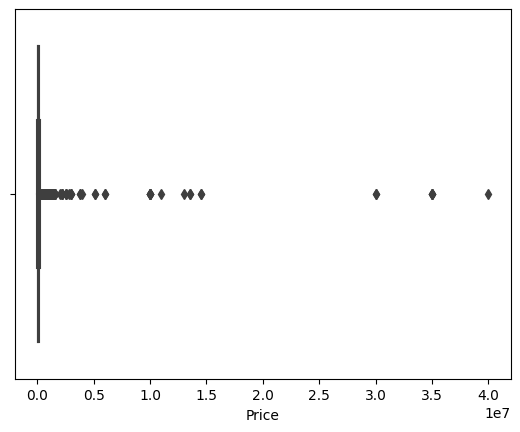

In [55]:
sns.boxplot(x = df.Price)

In [56]:

outliers_dict = {}

column = "Price"
z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

df = df[z_scores <= 3] 


<Axes: xlabel='Price'>

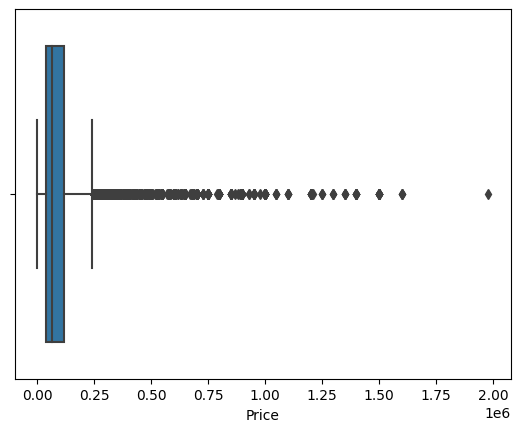

In [57]:
sns.boxplot(x = df.Price)

## Area

In [58]:
df.Area.info()

<class 'pandas.core.series.Series'>
Int64Index: 22450 entries, 0 to 23402
Series name: Area
Non-Null Count  Dtype 
--------------  ----- 
22450 non-null  object
dtypes: object(1)
memory usage: 350.8+ KB


In [59]:
df[['area_1', 'area_2']] = df['Area'].str.split(expand=True)

In [60]:
df.area_2.unique()

array(['12800', None, '12803', '12801', '12810', '12805', '12806',
       '12807', '12808'], dtype=object)

In [61]:
df.area_1.unique()

array(['750', '1980', '1592', ..., '15', '2', '20'], dtype=object)

based on the data we will drop the area two, given that does not show any value

In [62]:
df.drop(columns= ['Area','area_2'], inplace=True)

In [63]:
df['area_1'] = pd.to_numeric(df['area_1'], errors='coerce')

<Axes: xlabel='area_1'>

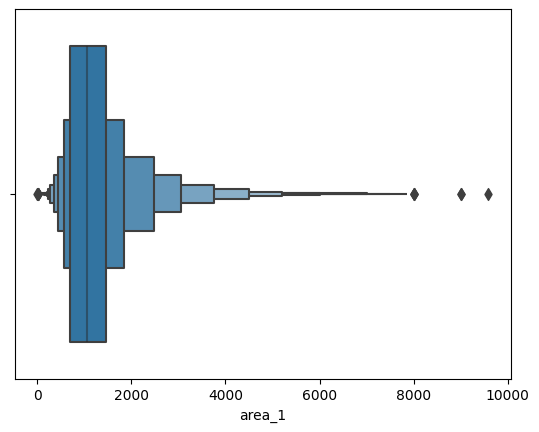

In [64]:
sns.boxenplot(x = df.area_1)

In [65]:
column = "area_1"
z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

df = df[z_scores <= 3] 

<Axes: xlabel='area_1'>

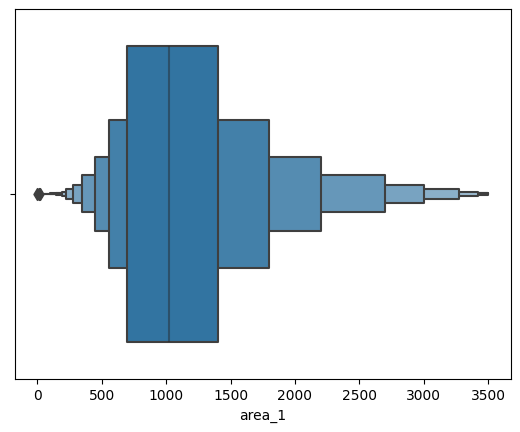

In [66]:

sns.boxenplot(x = df.area_1)

## Description

In [67]:
df.Description

0                  1 BHK, Multistorey Apartment is available for Rent in Bandra West, Mumbai for 70,000
1             3 BHK, Multistorey Apartment is available for Rent in Wadala East, Mumbai for 1.35 Lac(s)
2        3 BHK, Multistorey Apartment is available for Rent in Bhim Nagar Worli, Mumbai for 1.85 Lac(s)
3              3 BHK, Multistorey Apartment is available for Rent in Malad West, Mumbai for 1.50 Lac(s)
4            3 BHK, Multistorey Apartment is available for Rent in Andheri West, Mumbai for 1.40 Lac(s)
                                                      ...                                              
23383                     2 BHK, Multistorey Apartment is available for Rent in Santacruz East, Mumbai 
23384                              3 BHK, Multistorey Apartment is available for Rent in Virar, Mumbai 
23386                                  1 BHK, Residential House is available for Rent in Worli, Mumbai 
23390                                   1 BHK, Multistorey Apart

We already used the description column to extract missing information or new information, thus we are going to drop it

In [68]:
df.drop(columns='Description', inplace = True)

In [69]:
df.head()

,Title,Price,BHK,Bathrooms,Furnished,Balconies,Floor,Ownership,Facing,Amenities,Property Type,Year of Construction,Location,area_1
0,1BHK Multistorey Apartment for Rent in Bandra West,70000.0,1,1,Furnished,0,7,Unknown,South -West,Main Road,Apartment,2012.0,Bandra West,750.0
1,3BHK Multistorey Apartment for Rent in Lodha New Cuffe Parade at Wadala East,140000.0,3,4,Unfurnished,4,21,Unknown,East,"Garden/Park, Pool, Main Road",Apartment,1994.0,Wadala East,1980.0
2,3BHK Multistorey Apartment for Rent in Lodha Park at Bhim Nagar Worli,190000.0,3,3,Unfurnished,1,20,Unknown,North - East,Main Road,Apartment,2006.,Bhim Nagar Worli,1592.0
3,3BHK Multistorey Apartment for Rent in Rustomjee Elanza at Malad West,110000.0,3,3,Unfurnished,3,11,Freehold,West,"Garden/Park, Main Road",Apartment,2010.0,Malad West,1305.0
4,3BHK Multistorey Apartment for Rent in DLH The Park Residences at Andheri West,140000.0,3,3,Unfurnished,0,29,Freehold,East,"Pool, Garden/Park, Main Road",Apartment,2000.0,Andheri West,1350.0


In [70]:
list(df.columns)

['Title',
 'Price',
 'BHK',
 'Bathrooms',
 'Furnished',
 'Balconies',
 'Floor',
 'Ownership',
 'Facing',
 'Amenities',
 'Property Type',
 'Year of Construction',
 'Location',
 'area_1']

In [71]:
df1 = df[['Price','BHK']].groupby('BHK').mean(numeric_only = True)

In [72]:
df1

,Price
BHK,
1,20084.462151
1,34236.253529
2,70227.324343
3,147754.162384
4,275796.551724
5,312164.948454
6,341818.181818
7,665000.000000


<Axes: xlabel='BHK'>

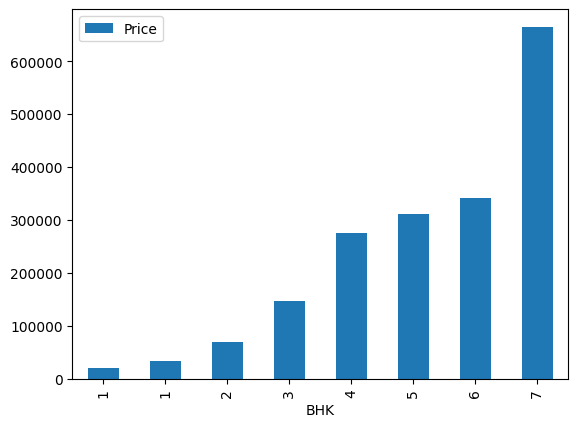

In [73]:
df1.plot(kind = 'bar')

<Axes: xlabel='Bathrooms', ylabel='Price'>

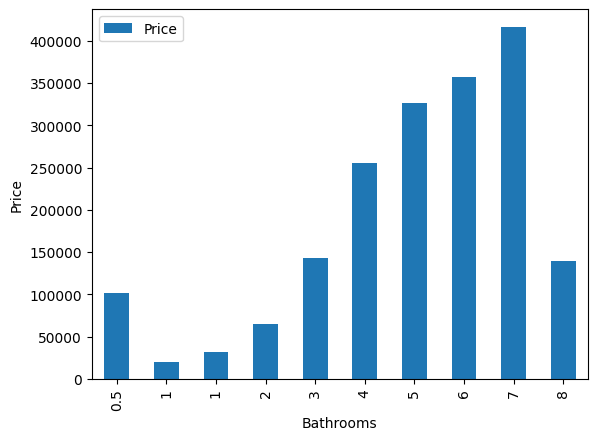

In [74]:
df[['Bathrooms','Price']].groupby('Bathrooms').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Bathrooms", ylabel = 'Price')

<Axes: xlabel='Bathrooms', ylabel='Price'>

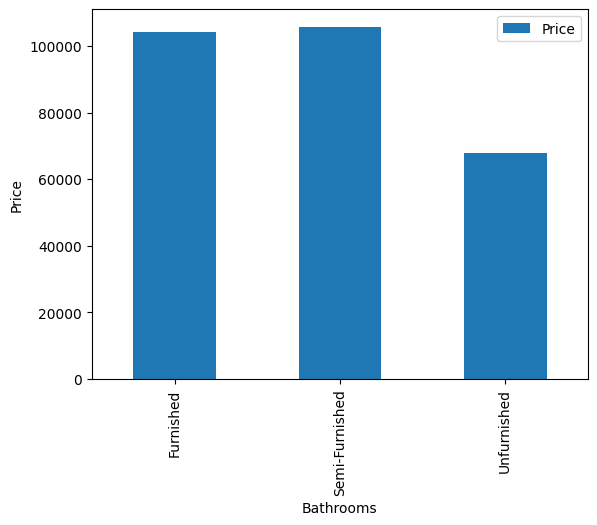

In [75]:
df[['Furnished','Price']].groupby('Furnished').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Bathrooms", ylabel = 'Price')

<Axes: xlabel='Ownership', ylabel='Price'>

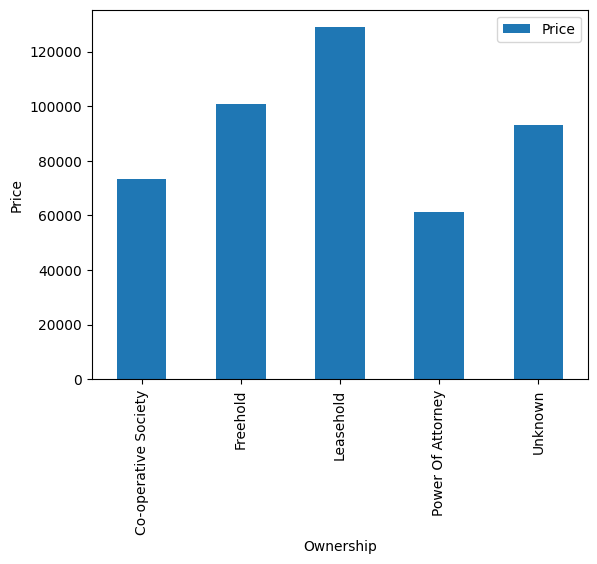

In [76]:
df[['Ownership','Price']].groupby('Ownership').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Ownership", ylabel = 'Price')



<Axes: xlabel='Facing', ylabel='Price'>

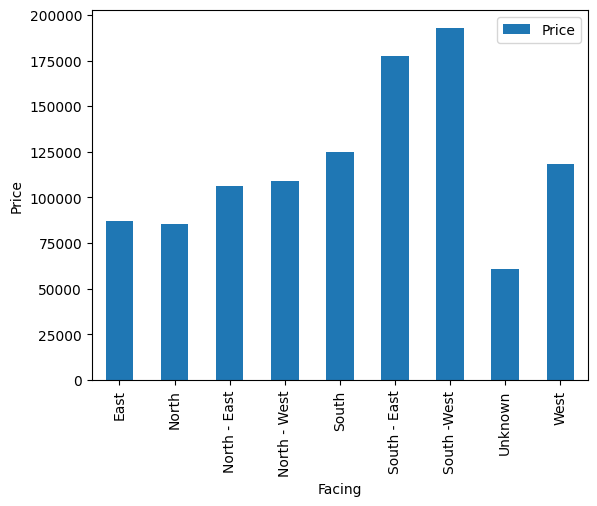

In [77]:
df[['Facing','Price']].groupby('Facing').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Facing", ylabel = 'Price')


#### Houses Facing South-East and South-West have the highest price 

<Axes: xlabel='Balconies', ylabel='Price'>

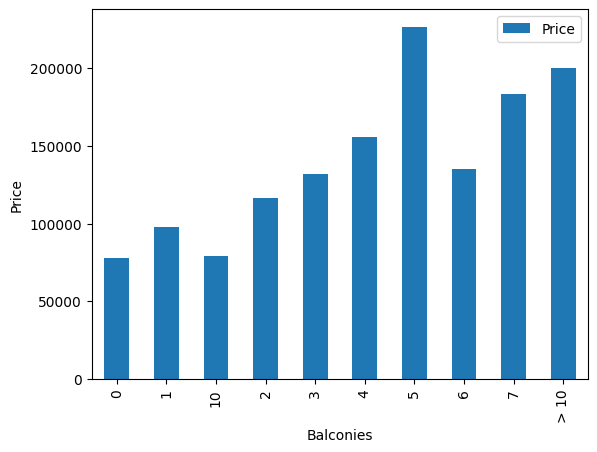

In [78]:
df[['Balconies','Price']].groupby('Balconies').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Balconies", ylabel = 'Price')


#### Houses with 5 balconies have the highest price

<Axes: xlabel='Amenities', ylabel='Price'>

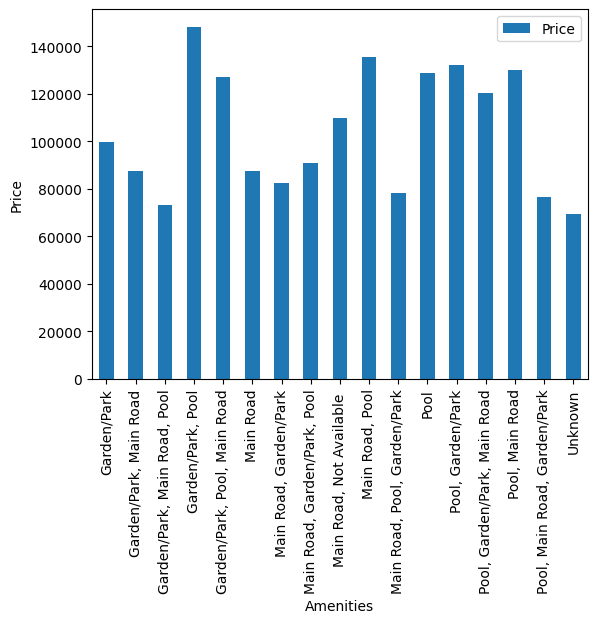

In [79]:
df[['Amenities','Price']].groupby('Amenities').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Amenities", ylabel = 'Price')


#### Houses with Amenities as Garden/Park Pool have the highest price

<Axes: xlabel='Year of Construction', ylabel='Price'>

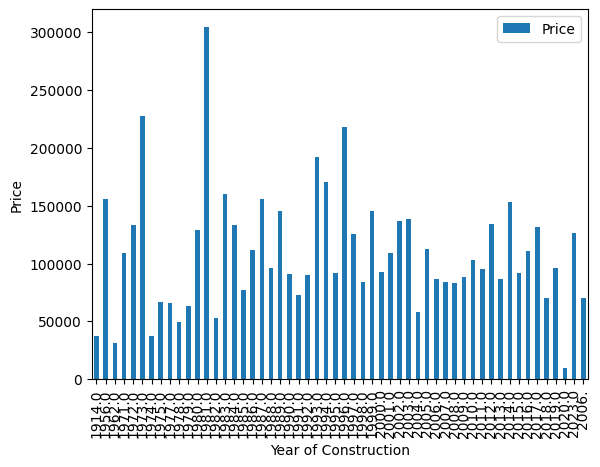

In [80]:
df[['Year of Construction','Price']].groupby('Year of Construction').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Year of Construction", ylabel = 'Price')


#### Houses constructed in 1980 have the maximum price

<Axes: xlabel='Property Type', ylabel='Price'>

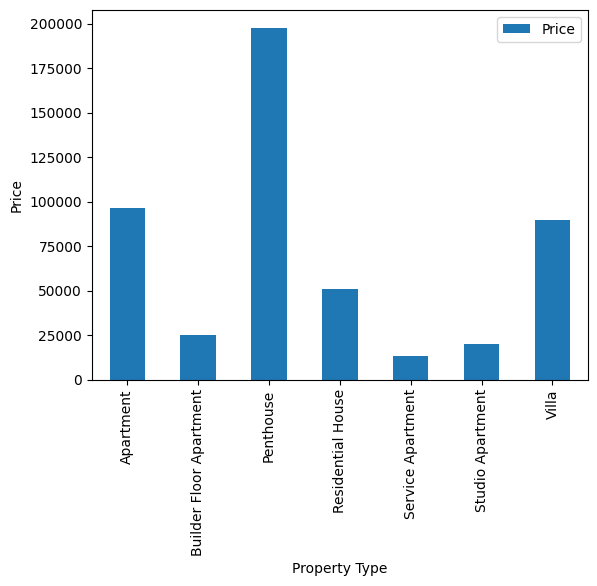

In [81]:
df[['Property Type','Price']].groupby('Property Type').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Property Type", ylabel = 'Price')


#### Penhouses are the costliest

<Axes: xlabel='Location', ylabel='Price'>

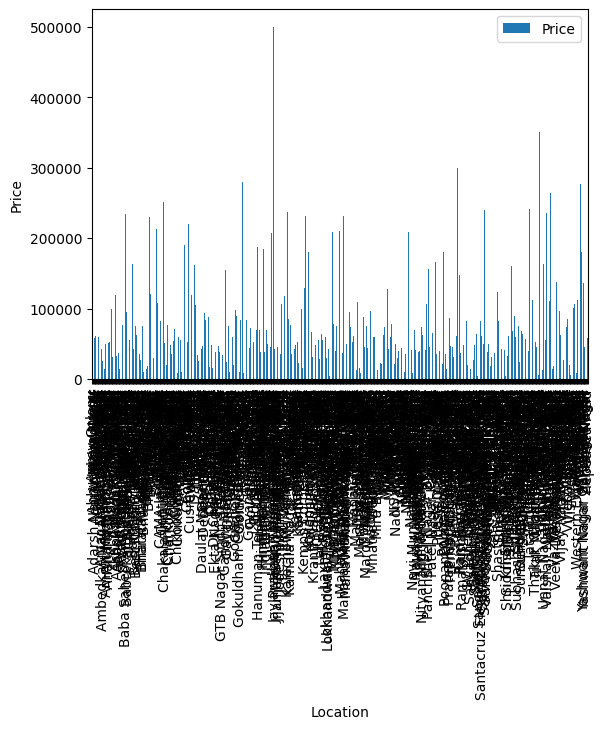

In [82]:
df[['Location','Price']].groupby('Location').mean(numeric_only = True).plot(kind = 'bar', xlabel = "Location", ylabel = 'Price')


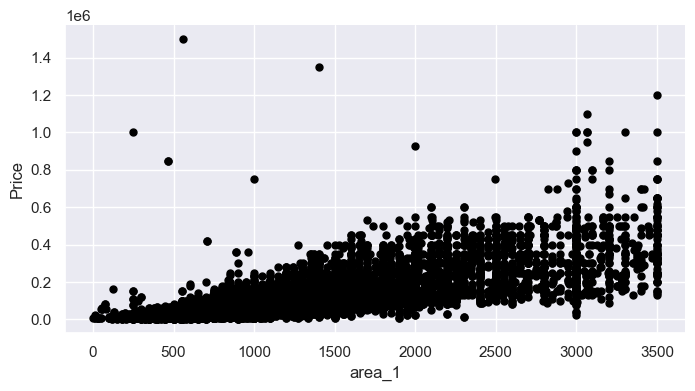

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 4)})

fig, ax = plt.subplots()
# plt.figure(figsize=(8, 8))
plt.scatter(df['area_1'], df['Price'], s=25 ,c = "black") # the s option specifies the size of the dot
ax.set_xlabel('area_1')
ax.set_ylabel('Price')
sns.despine()
plt.show()

/var/folders/wr/gsfv7by93j599fxlzzp32z1w0000gn/T/ipykernel_2571/1618317635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


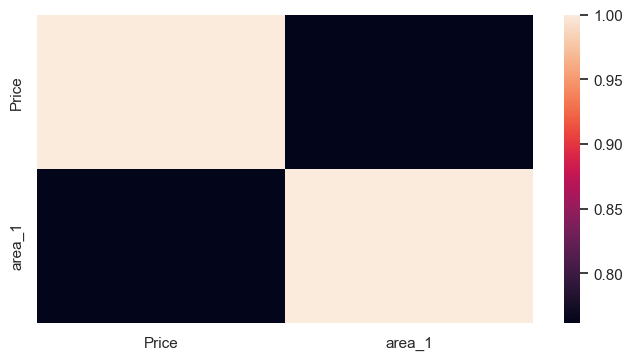

In [84]:
import seaborn as sns
sns.heatmap(df.corr())
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

#### Price and Area are highly correlated

## Lets dive deeper in categorical columns

In [85]:
df_cat = df.select_dtypes(include = 'object' )

In [86]:
for feature in df_cat:
    print("The feature {} has {} number of categories".format(feature, len(df_cat[feature].unique())))
    

The feature Title has 6591 number of categories
The feature BHK has 8 number of categories
The feature Bathrooms has 10 number of categories
The feature Furnished has 3 number of categories
The feature Balconies has 10 number of categories
The feature Floor has 80 number of categories
The feature Ownership has 5 number of categories
The feature Facing has 9 number of categories
The feature Amenities has 17 number of categories
The feature Property Type has 7 number of categories
The feature Year of Construction has 54 number of categories
The feature Location has 640 number of categories


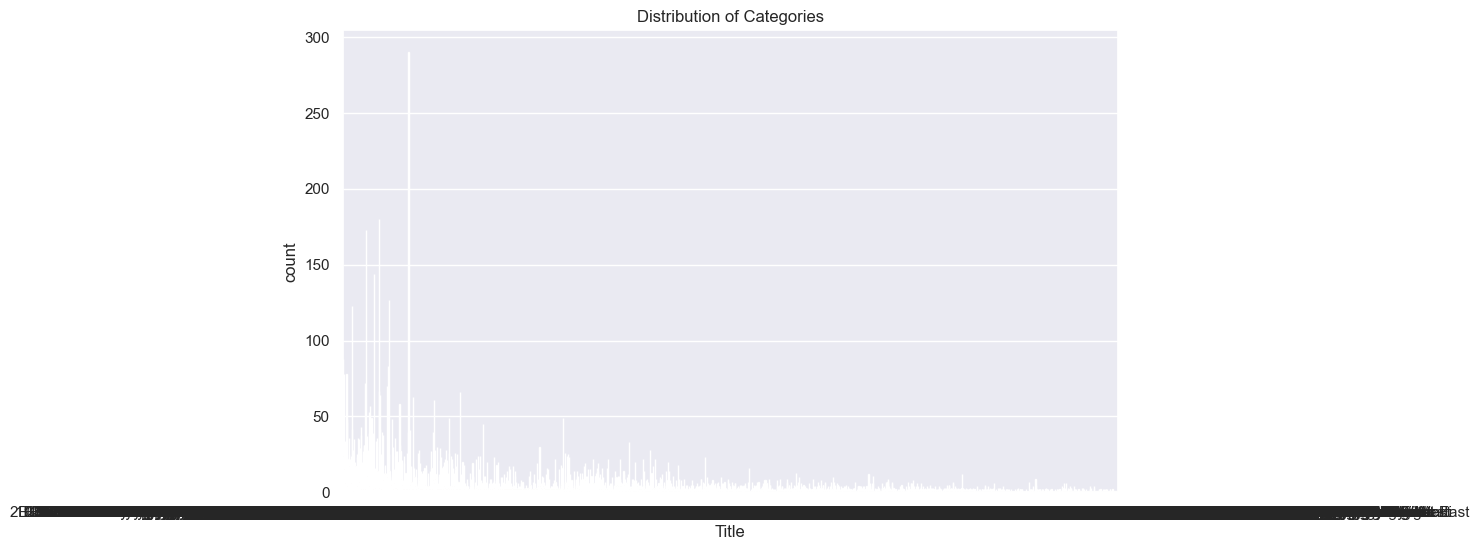

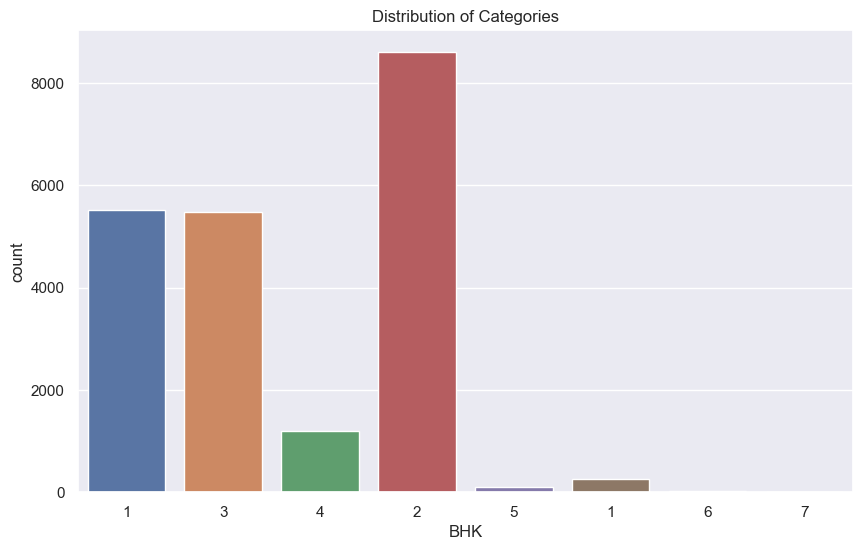

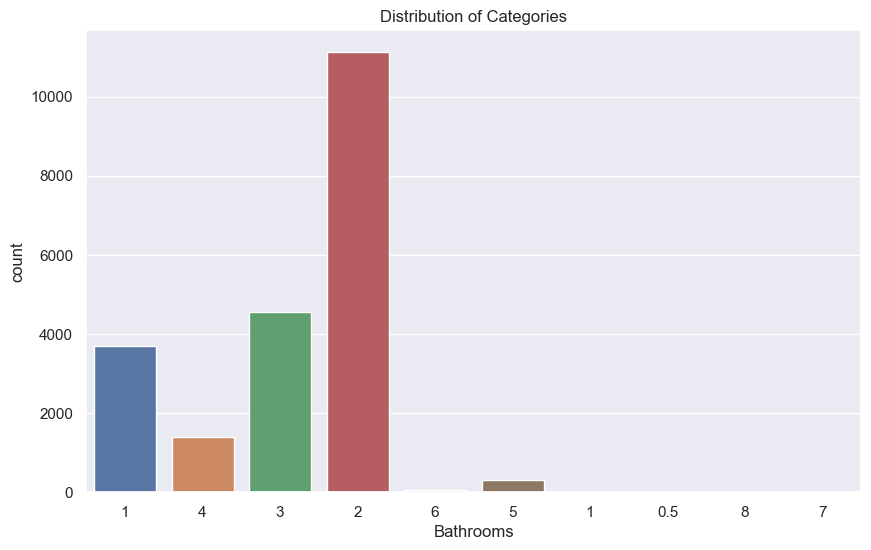

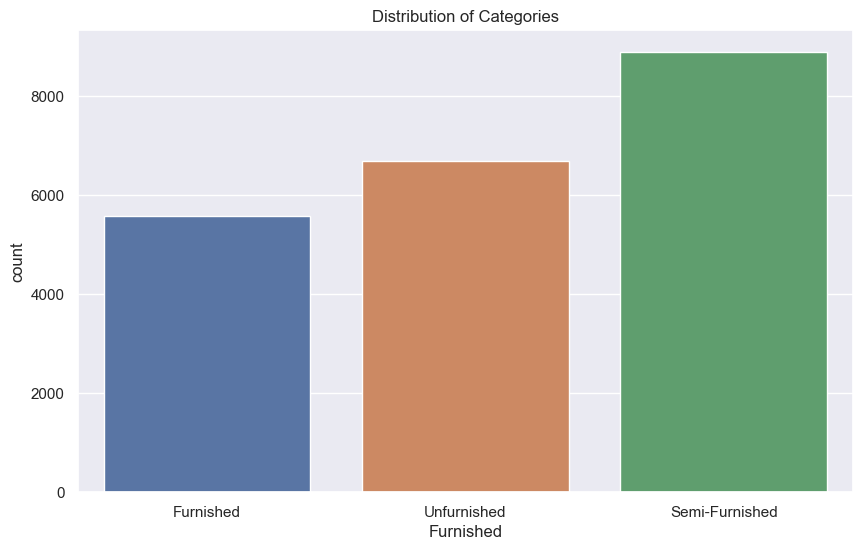

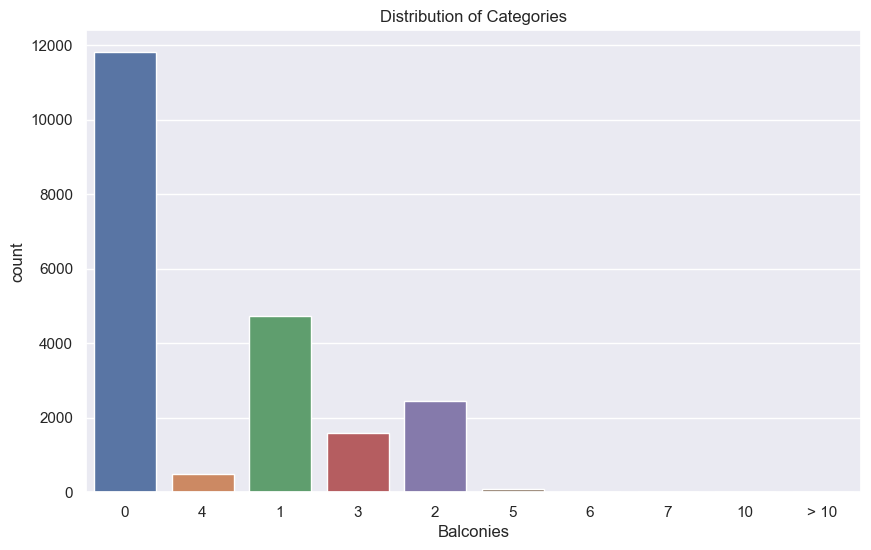

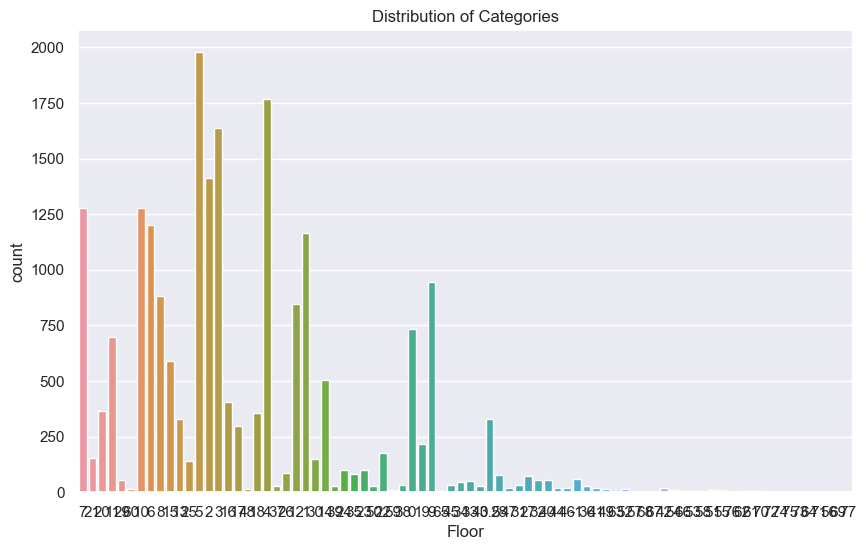

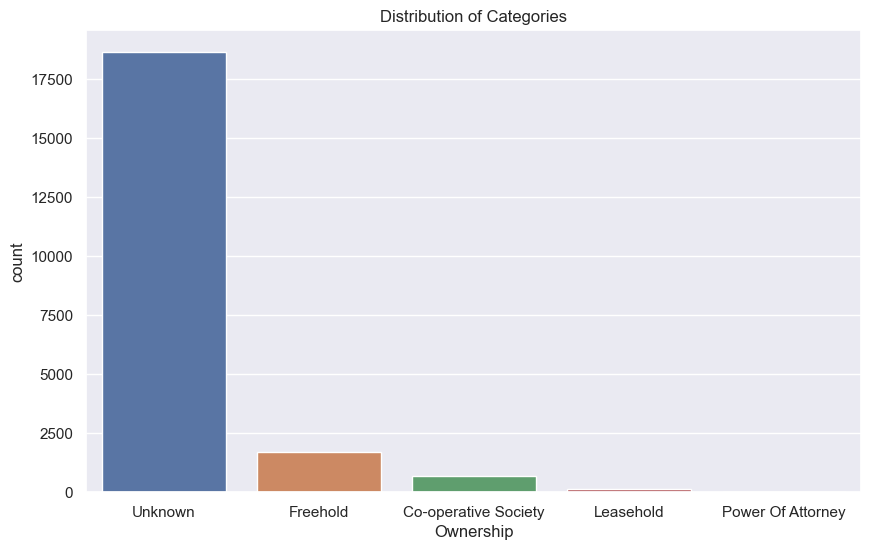

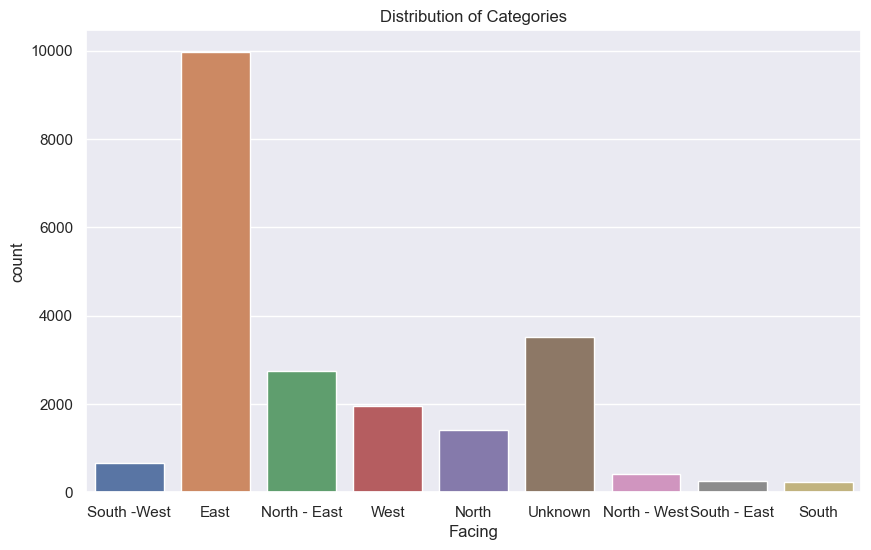

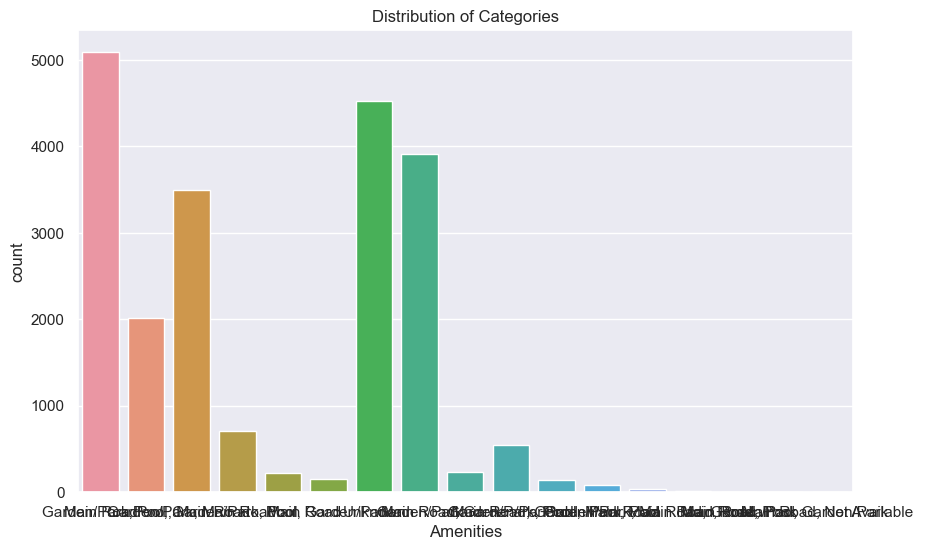

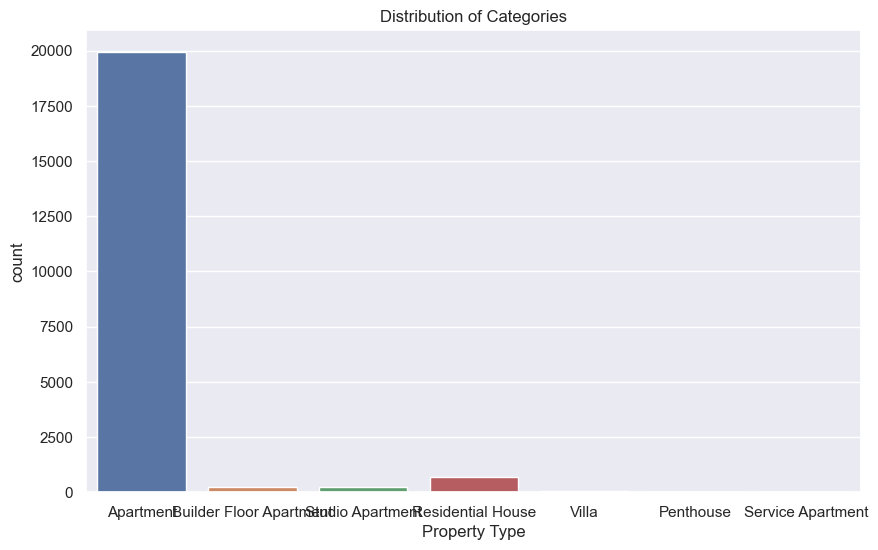

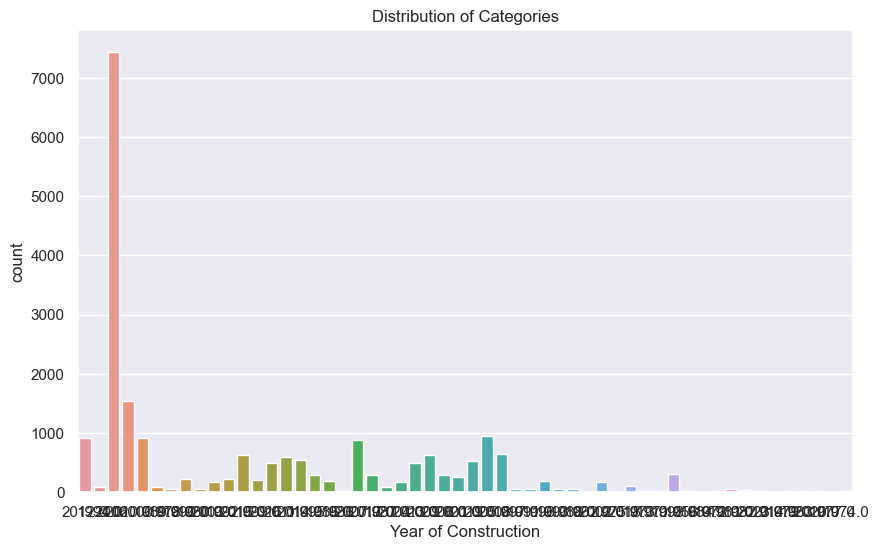

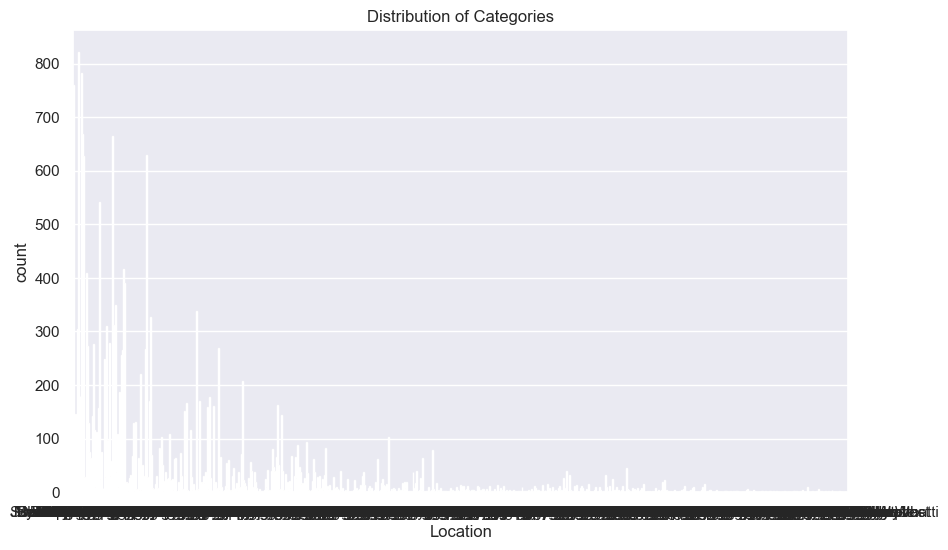

In [87]:
for feature in df_cat.columns:
    plt.figure(figsize =(10,6))
    sns.countplot(x = feature, data=df)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Distribution of Categories')
    plt.show()